#planning a different approch to do titanic data set on kaggle by refering kaggle submitted codes

#here is the link i used for reference for prepration of this note book:https://www.kaggle.com/kenjee/titanic-project-example

#Data set obtained from the kaggle and predownloaded to my pc


In [1]:
#importing neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading data set to this notebook

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Checking head of both data set to verfy imported correctely
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#all exploratory data analysis done on the train data set only
#To make anlayis easier the train test table is joined
#In test set there is no survived coloumn. Survived column is created on test column and assinged 'NaN' values
#To make test split easier after analysis the new column 'train_test' is created in in the test and train set
#For training the 'train_test' given value of  and for test 'train_test' given value of 

train['train_test'] = 1
test['train_test'] = 0

test['Survived'] = np.NaN

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,NaN


In [8]:
#Train and test data set joined using pandas concat 

all_data = pd.concat([train,test],axis=0)

In [9]:
all_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
all_data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [11]:
all_data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [12]:
#looking into data types of each columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [14]:
#Checking the the column values and seperating numerical and categorical values
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [15]:
#to get numeric columns
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [16]:
#seperating numeric and categorical columns 

df_num = train[['Age', 'SibSp', 'Parch', 'Fare']]


In [17]:
#checking for categorical column
list(set(train.columns) - set(train.describe().columns))


['Cabin', 'Name', 'Sex', 'Embarked', 'Ticket']

In [18]:
#categorical column
df_cat = train[['Ticket', 'Cabin','Embarked', 'Sex','Pclass','Survived']]

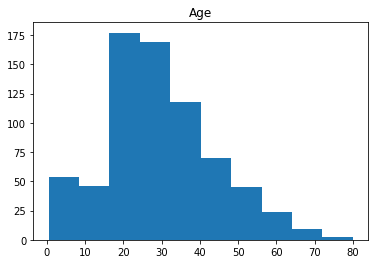

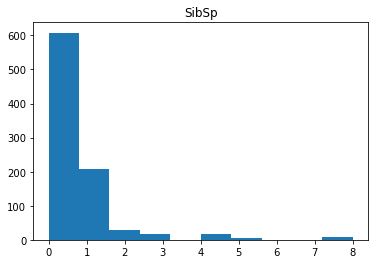

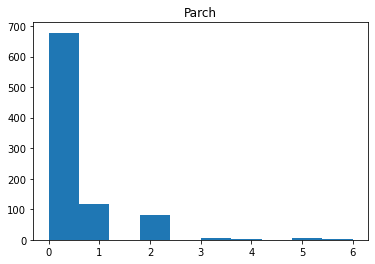

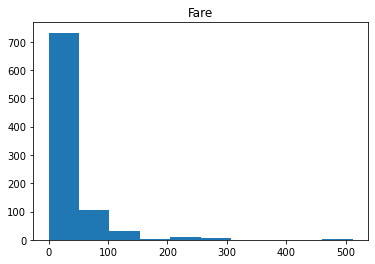

In [19]:
#ploting for all numerical columns

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [20]:
#checking for numerical corelation
df_num.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

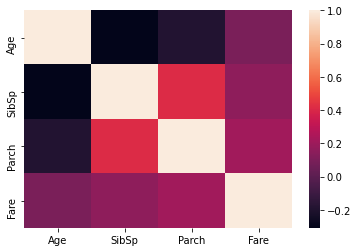

In [21]:
sns.heatmap(df_num.corr())

In [22]:
pd.pivot_table(train,index=['Survived'],values=['Age', 'SibSp', 'Parch', 'Fare'])

# compare survival rate across Age, SibSp, Parch, and Fare 

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


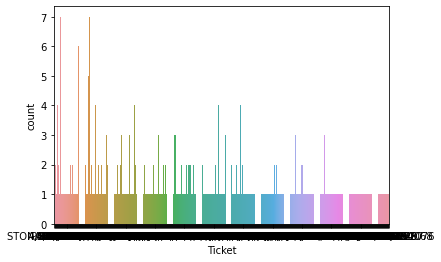

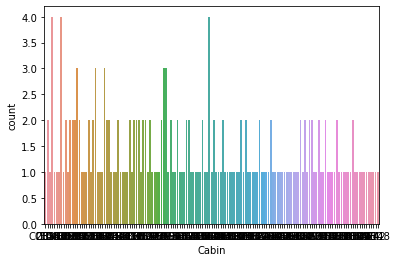

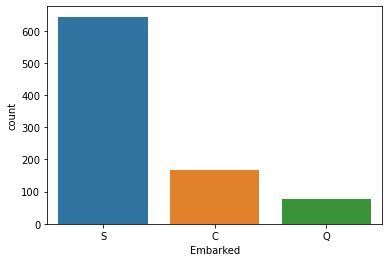

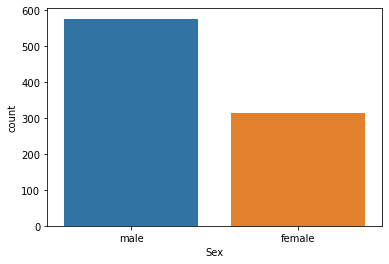

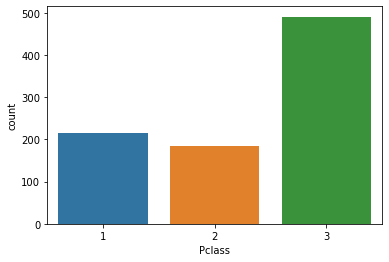

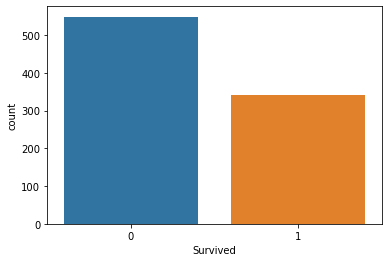

In [23]:
#ploting for categorical columns

for i in df_cat.columns:
    sns.countplot(x=df_cat[i])
    plt.show()

The ticket and cabin graphs are messy.later will check the chances of feature engineering

In [24]:
#creatin pivot_table to compare values of survived with pclass,sex,embarked
print(pd.pivot_table(train,index='Survived',columns='Pclass',aggfunc='count',values='Ticket'))
print()
print(pd.pivot_table(train,index='Survived',columns='Sex',aggfunc='count',values='Ticket'))
print()
print(pd.pivot_table(train,index='Survived',columns='Embarked',aggfunc='count',values='Ticket'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



Feature Engineering
1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

2) Tickets - Do different ticket types impact survival rates?

3) Does a person's title relate to survival rates?

In [25]:
df_cat.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [26]:
train['cabin_multiple'] = train['Cabin'].apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 



In [27]:
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [28]:
#checking the survived count using pivot table
pd.pivot_table(train,index='Survived',columns='cabin_multiple',values='Ticket',aggfunc='count')

#impacting the value count of survived by ticket 

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [29]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

train['cabin_adv'] = train['Cabin'].apply(lambda x: str(x)[0])

In [30]:
print(train.cabin_adv.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


In [31]:
#checking status of survived based on cabin letters
pd.pivot_table(train,index='Survived',columns='cabin_adv',aggfunc='count',values='Ticket')

#cabin letters impacted the survival rate

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [32]:
#understand ticket values better 
#numeric vs non numeric 

train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [33]:
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [34]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [35]:
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [36]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.set_option("max_rows", None)
train['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
wep            3
pp             3
scah           2
sotono2        2
swpp           2
ppp            2
fc             1
sop            1
scahbasle      1
sc             1
sp             1
scow           1
fa             1
casoton        1
sca4           1
as             1
Name: ticket_letters, dtype: int64

In [37]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(train,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [38]:
#survival rate across different ticket types 
pd.pivot_table(train,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [39]:
#feature engineering on person's title 
train['Name'].head()


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [40]:
train['name_title']=train.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [41]:
train['name_title']

0                Mr
1               Mrs
2              Miss
3               Mrs
4                Mr
5                Mr
6                Mr
7            Master
8               Mrs
9               Mrs
10             Miss
11             Miss
12               Mr
13               Mr
14             Miss
15              Mrs
16           Master
17               Mr
18              Mrs
19              Mrs
20               Mr
21               Mr
22             Miss
23               Mr
24             Miss
25              Mrs
26               Mr
27               Mr
28             Miss
29               Mr
30              Don
31              Mrs
32             Miss
33               Mr
34               Mr
35               Mr
36               Mr
37               Mr
38             Miss
39             Miss
40              Mrs
41              Mrs
42               Mr
43             Miss
44             Miss
45               Mr
46               Mr
47             Miss
48               Mr
49              Mrs


In [42]:
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Ms                1
Sir               1
Lady              1
Name: name_title, dtype: int64

# Data processing of the model

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  train_test      891 non-null    int64  
 13  cabin_multiple  891 non-null    int64  
 14  cabin_adv       891 non-null    object 
 15  numeric_ticket  891 non-null    int64  
 16  ticket_letters  891 non-null    object 
 17  name_title      891 non-null    obj

1. Drop the null values from Embarked (only 2 values)

2. inlcuding revelevent features only(exculding name,passenger id)
variables incluing:pclass,sex,age,sibsp,parch,fare,cabin_adv,cabin_multiple,numeric_ticket,name_title

3.Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums.

4.Impute data with mean for fare and age (Should also experiment with median)

5.Normalized fare using logarithm to give more semblance of a normal distribution

6.Scaled data 0-1 with standard scaler

In [44]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

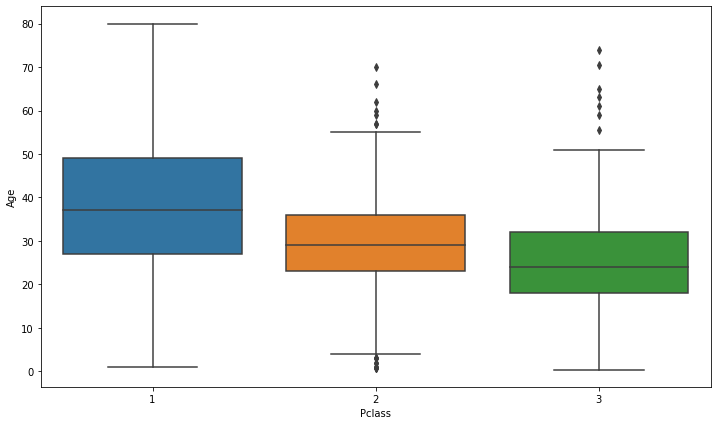

In [45]:
#creating a function to impute age by pclass 
#checking mean age of p class by train and test data
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

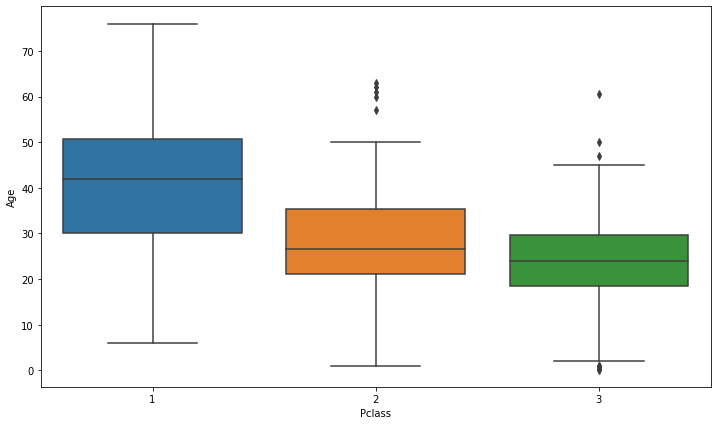

In [46]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test)


In [47]:
#creating a function to impute the missing value to train data of by mean of pclass
#The median age of pclass 1 is 37,pclass 2 is 29 and pclass 3 is 25 Creating a function to fill the missing age values

def fill_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [48]:
print(all_data['Age'].isnull().value_counts())
print()
print(train['Age'].isnull().value_counts())
print()
print(test['Age'].isnull().value_counts())


False    1046
True      263
Name: Age, dtype: int64

False    714
True     177
Name: Age, dtype: int64

False    332
True      86
Name: Age, dtype: int64


In [49]:
#applying age applying 
all_data['Age'] =all_data[['Age','Pclass']].apply(fill_age,axis=1)

In [50]:
print(all_data['Age'].isnull().value_counts())

False    1309
Name: Age, dtype: int64


In [51]:
#counting missing values in fare
print(all_data['Fare'].isnull().value_counts())

False    1308
True        1
Name: Fare, dtype: int64


In [52]:
#only one missing value..filling fare by median value
all_data.Fare = all_data.Fare.fillna(train.Fare.median())

In [53]:
print(all_data['Embarked'].isnull().value_counts())
print()
print(train['Embarked'].isnull().value_counts())
print()
print(test['Embarked'].isnull().value_counts())


False    1307
True        2
Name: Embarked, dtype: int64

False    889
True       2
Name: Embarked, dtype: int64

False    418
Name: Embarked, dtype: int64


In [54]:
#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

<AxesSubplot:>

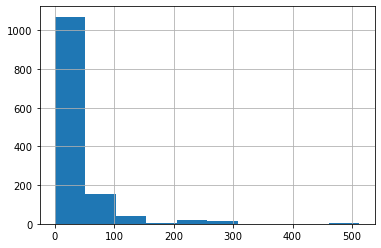

In [55]:
#log norm of fare to get a normal distribution
all_data['Fare'].hist()



In [56]:
all_data['norm_fare'] = np.log(all_data.Fare+1)

<AxesSubplot:>

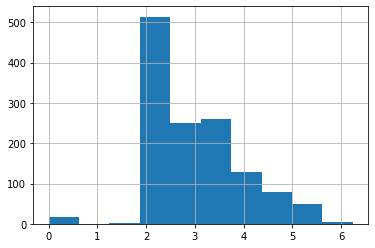

In [57]:
all_data['norm_fare'].hist()

In [58]:
# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

In [59]:
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

In [60]:
#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

In [61]:
y_train = all_data[all_data.train_test==1].Survived

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(889, 41)
(418, 41)
(889,)


In [63]:
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'norm_fare', 'cabin_multiple',
       'numeric_ticket', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'cabin_adv_A',
       'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D', 'cabin_adv_E',
       'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_T', 'cabin_adv_n',
       'name_title_Capt', 'name_title_Col', 'name_title_Don',
       'name_title_Dona', 'name_title_Dr', 'name_title_Jonkheer',
       'name_title_Lady', 'name_title_Major', 'name_title_Master',
       'name_title_Miss', 'name_title_Mlle', 'name_title_Mme', 'name_title_Mr',
       'name_title_Mrs', 'name_title_Ms', 'name_title_Rev', 'name_title_Sir',
       'name_title_the Countess'],
      dtype='object')

In [64]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()

In [65]:
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])

In [66]:
all_dummies_scaled

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.557637,0.480272,-0.445407,-0.896331,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.668749,0.480272,-0.445407,1.347870,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.251040,-0.479537,-0.445407,-0.815013,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.438802,0.480272,-0.445407,1.048255,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.438802,-0.479537,-0.445407,-0.800632,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,-0.327689,-0.479537,-0.445407,-0.755003,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,1.895136,-0.479537,-0.445407,1.024328,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,-2.090620,2.399890,0.709647,0.121378,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8,-0.174391,-0.479537,1.864701,-0.497471,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9,-1.170830,0.480272,-0.445407,0.474827,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

# Model Building (Baseline Validation Performance)

#Tried following models using 5 fold cross validation to get a baseline

    Naive Bayes 
    Logistic Regression 
    Decision Tree 
    K Nearest Neighbor 
    Random Forest 
    Support Vector Classifier 
    Xtreme Gradient Boosting 
    Soft Voting Classifier - All Models



In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [ ]:
#CHE

In [69]:
#Naive bayes classifier
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [70]:
#Logestic_regression
log_reg = LogisticRegression(max_iter = 2000)
cv = cross_val_score(log_reg,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.82022472 0.80337079 0.82022472 0.85310734]
0.8234304576905986


In [71]:
#tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.78089888 0.83707865 0.76966292 0.76836158]
0.7840093950358662


In [72]:
#Kneighbours
knn =  KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [73]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.85875706]
0.8313019742271314


In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.80898876 0.85393258 0.79213483 0.83615819]
0.820040627182124


In [81]:
#Voting classifier takes all of the inputs and averages the results.
#For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote.
#For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% 
#that it is a 1 it will be counted as such

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators = [('log_reg',log_reg),('knn',knn),('dt',dt),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [82]:


cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())


[0.80898876 0.81460674 0.80898876 0.82022472 0.85875706]
0.8223132101821875


In [83]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)

In [84]:
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)